<font size="4">**1. Импорт библиотек и загрузка сводных обработанных данных (ГО и подразделения)**</font>

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_excel('Свод ГО и подразделения.xlsx')  

<font size="4">**2. Предварительный анализ данных**</font> <br>
<br>
Проверка структуры данных:

In [294]:
# Сводная таблица по двум категориям
headquarters = df[df['type'] == 'Головной офис']
subdivisions = df[df['type'] != 'Головной офис']

summary_table = pd.DataFrame({
    'Категория': ['Головные офисы', 'Подразделения', 'Всего'],
    'Количество': [len(headquarters), len(subdivisions), len(df)],
    'Доля (%)': [
        round(len(headquarters)/len(df)*100, 2),
        round(len(subdivisions)/len(df)*100, 2),
        100.00
    ]
})

print("Сводная таблица:")
print(summary_table.to_string(index=False))

Сводная таблица:
     Категория  Количество  Доля (%)
Головные офисы        7909      16.2
 Подразделения       40917      83.8
         Всего       48826     100.0


In [296]:
# Сводная таблица по двум категориям
headquarters = df[df['type'] == 'Головной офис']
subdivisions = df[df['type'] != 'Головной офис']

# Создала основную таблицу
summary_data = []

# Головные офисы - заголовок
summary_data.append({'Категория': '=== ГОЛОВНЫЕ ОФИСЫ ===', 'Количество': len(headquarters), 'Доля (%)': round(len(headquarters)/len(df)*100, 2)})

# Детализация по видам организаций для головных офисов
for tp_value, count in headquarters['tp'].value_counts().items():
    summary_data.append({'Категория': f"  {tp_value}", 'Количество': count, 'Доля (%)': round(count/len(df)*100, 2)})

# Подразделения - заголовок
summary_data.append({'Категория': '=== ПОДРАЗДЕЛЕНИЯ ===', 'Количество': len(subdivisions), 'Доля (%)': round(len(subdivisions)/len(df)*100, 2)})

# Детализация по видам организаций для подразделений
for tp_value, count in subdivisions['tp'].value_counts().items():
    summary_data.append({'Категория': f"  {tp_value}", 'Количество': count, 'Доля (%)': round(count/len(df)*100, 2)})

# Итого
summary_data.append({'Категория': '=== ВСЕГО ===', 'Количество': len(df), 'Доля (%)': 100.00})

summary_table = pd.DataFrame(summary_data)

print("Сводная таблица:")
print(summary_table.to_string(index=False))

Сводная таблица:
                                                                                                     Категория  Количество  Доля (%)
                                                                                        === ГОЛОВНЫЕ ОФИСЫ ===        7909     16.20
                                                                                                      Ломбарды        1854      3.80
                                                                         Кредитные потребительские кооперативы        1333      2.73
                                                                                       Микрокредитные компании         866      1.77
                                                                                  Операторы по приему платежей         669      1.37
                                                    Сельскохозяйственные кредитные потребительские кооперативы         501      1.03
                                                    

In [298]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48826 entries, 0 to 48825
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                46694 non-null  object 
 1   inn                 48826 non-null  object 
 2   ogrn                48826 non-null  object 
 3   adr                 48820 non-null  object 
 4   tp                  48826 non-null  object 
 5   type                48826 non-null  object 
 6   main_name           40100 non-null  object 
 7   main_adr            40100 non-null  object 
 8   short_name          7909 non-null   object 
 9   subj_code1          7909 non-null   object 
 10  subj_code2          7909 non-null   object 
 11  found_by            48811 non-null  object 
 12  postal_code         47503 non-null  object 
 13  federal_district    48821 non-null  object 
 14  region              48826 non-null  object 
 15  area                21425 non-null  object 
 16  city

<font size="4">**3. Группировка по федеральным округам и регионам**</font> <br>
<br>
3.1. Количество организаций по федеральным округам

In [301]:
# Создала копию данных для работы
df_plot = df.copy()

In [303]:
# Заменила пустые значения в federal_district на "Новые регионы"
df_plot['federal_district'] = df_plot['federal_district'].fillna('Иные')

# Группировка по федеральным округам
district_stats = df_plot.groupby('federal_district', as_index=False).size().sort_values('size', ascending=False)
district_stats

,federal_district,size
8,Центральный,12397
3,Приволжский,10592
6,Сибирский,6356
9,Южный,5650
4,Северо-Западный,4425
7,Уральский,4379
0,Дальневосточный,2872
5,Северо-Кавказский,1496
2,Новые регионы,654
1,Иные,5


In [305]:
# Подсчет головных офисов и подразделений для каждого округа
headquarters_count = df_plot[df_plot['type'] == 'Головной офис'].groupby('federal_district').size()
subdivisions_count = df_plot[df_plot['type'] != 'Головной офис'].groupby('federal_district').size()

In [307]:
# Добавила данные в таблицу
district_stats = district_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='federal_district', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='federal_district', 
    right_index=True, 
    how='left'
)
district_stats

,federal_district,size,headquarters,subdivisions
8,Центральный,12397,3415,8982
3,Приволжский,10592,1159,9433
6,Сибирский,6356,928,5428
9,Южный,5650,648,5002
4,Северо-Западный,4425,622,3803
7,Уральский,4379,458,3921
0,Дальневосточный,2872,384,2488
5,Северо-Кавказский,1496,259,1237
2,Новые регионы,654,35,619
1,Иные,5,1,4


Визуализация:

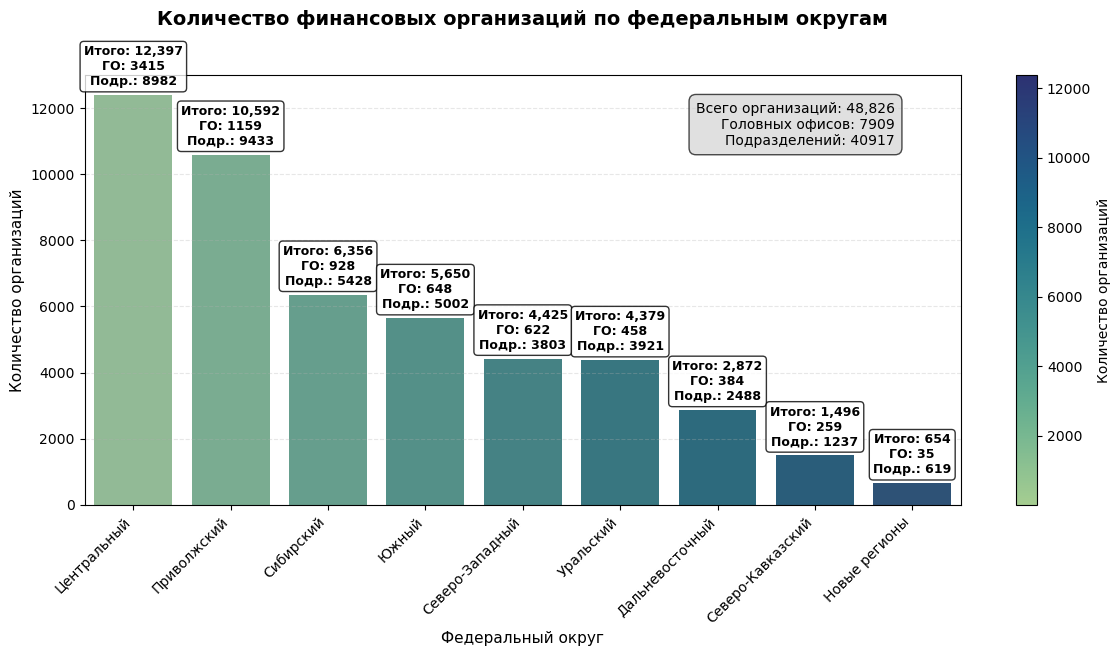

Статистика по федеральным округам:
 federal_district  size  headquarters  subdivisions
      Центральный 12397          3415          8982
      Приволжский 10592          1159          9433
        Сибирский  6356           928          5428
            Южный  5650           648          5002
  Северо-Западный  4425           622          3803
        Уральский  4379           458          3921
  Дальневосточный  2872           384          2488
Северо-Кавказский  1496           259          1237
    Новые регионы   654            35           619
             Иные     5             1             4

Всего организаций: 48826
Головных офисов: 7909
Подразделений: 40917


In [309]:
# Нормализация значений для цветовой шкалы (0-1)
norm = plt.Normalize(district_stats['size'].min(), district_stats['size'].max())

# Задала явный порядок
correct_order = [
    'Центральный',
    'Приволжский', 
    'Сибирский',
    'Южный',
    'Северо-Западный',
    'Уральский',
    'Дальневосточный',
    'Северо-Кавказский',
    'Новые регионы'
]

# Создала словарь с данными
data_dict = {}
for district in correct_order:
    data = district_stats[district_stats['federal_district'] == district].iloc[0]
    data_dict[district] = {
        'total': data['size'],
        'ho': data['headquarters'],
        'sub': data['subdivisions']
    }
    
# Визуализация (столбчатая диаграмма)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=district_stats, 
    x='federal_district', 
    y='size', 
    hue='federal_district',  
    palette="crest", 
    legend=False,            
    dodge=False,
    order=correct_order      
)

# Добавила подписи 
for i, p in enumerate(ax.patches):
    district_name = correct_order[i]
    data = data_dict[district_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Добавила цветовую шкалу
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("crest", as_cmap=True), norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Количество организаций', fontsize=10)

# Настройка внешнего вида
plt.title('Количество финансовых организаций по федеральным округам\n', 
          pad=20, fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество организаций', fontsize=11)
plt.xlabel('Федеральный округ', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Общая статистика
total_orgs = len(df_plot)
total_ho = len(df_plot[df_plot['type'] == 'Головной офис'])
total_sub = len(df_plot[df_plot['type'] != 'Головной офис'])

# Перемещение блока статистики в правый верхний угол
plt.figtext(0.75, 0.75, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  
plt.show()

print("Статистика по федеральным округам:")
print(district_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")

<font size="4">**3.2. Количество организаций по регионам (ТОП-15)**</font>

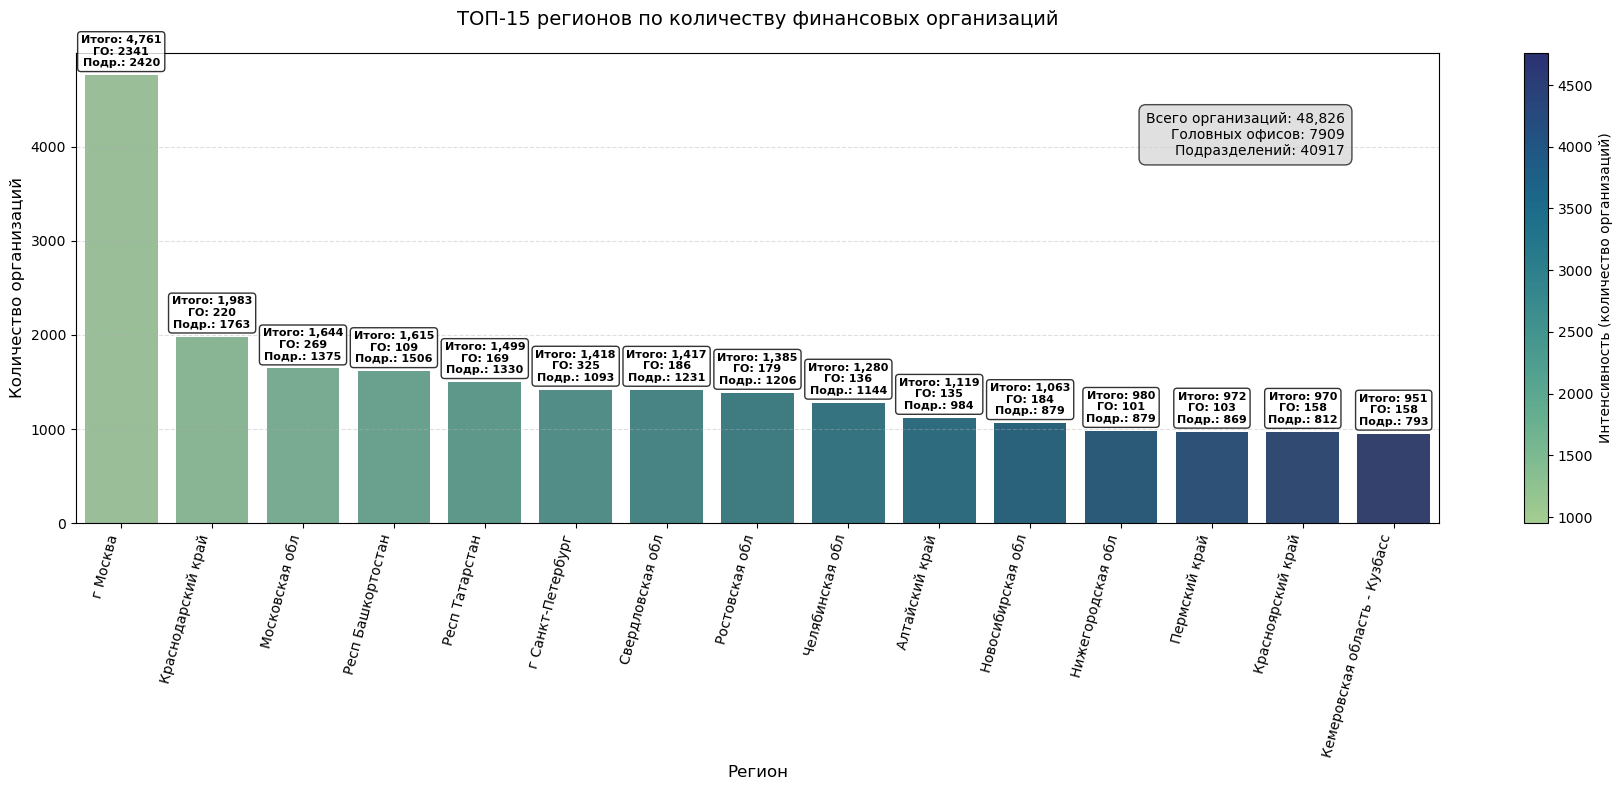

Статистика по ТОП-15 регионам:
                       region  size  headquarters  subdivisions
                     г Москва  4761          2341          2420
           Краснодарский край  1983           220          1763
               Московская обл  1644           269          1375
            Респ Башкортостан  1615           109          1506
               Респ Татарстан  1499           169          1330
            г Санкт-Петербург  1418           325          1093
             Свердловская обл  1417           186          1231
               Ростовская обл  1385           179          1206
              Челябинская обл  1280           136          1144
               Алтайский край  1119           135           984
            Новосибирская обл  1063           184           879
            Нижегородская обл   980           101           879
                Пермский край   972           103           869
            Красноярский край   970           158           812
Кемеровск

In [312]:
# Группировка по регионам
region_stats = df.groupby('region', as_index=False).size().sort_values('size', ascending=False).head(15)

# Подсчет головных офисов и подразделений для каждого региона
headquarters_count = df[df['type'] == 'Головной офис'].groupby('region').size()
subdivisions_count = df[df['type'] != 'Головной офис'].groupby('region').size()

# Добавила данные в таблицу
region_stats = region_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='region', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='region', 
    right_index=True, 
    how='left'
)

# Заполнила пропущенные значения нулями
region_stats[['headquarters', 'subdivisions']] = region_stats[['headquarters', 'subdivisions']].fillna(0).astype(int)

# Нормализация значений для цветовой шкалы
norm = plt.Normalize(region_stats['size'].min(), region_stats['size'].max())

# Создала словарь с данными для быстрого доступа
data_dict = {}
for _, row in region_stats.iterrows():
    data_dict[row['region']] = {
        'total': row['size'],
        'ho': row['headquarters'],
        'sub': row['subdivisions']
    }

# Визуализация
plt.figure(figsize=(18, 8))
ax = sns.barplot(
    data=region_stats, 
    x='region', 
    y='size', 
    hue='region',  
    palette=sns.color_palette("crest", n_colors=len(region_stats)),
    legend=False,
    dodge=False
)

# Добавила подписи данных с детализацией
for i, p in enumerate(ax.patches):
    region_name = region_stats.iloc[i]['region']
    data = data_dict[region_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=8,  
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Настройка внешнего вида
plt.title('ТОП-15 регионов по количеству финансовых организаций', 
          fontsize=14, pad=20)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Количество организаций', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Цветовая шкала
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("crest", as_cmap=True), norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Интенсивность (количество организаций)', fontsize=10)

# Общая статистика
total_orgs = len(df)
total_ho = len(df[df['type'] == 'Головной офис'])
total_sub = len(df[df['type'] != 'Головной офис'])

# Перемещение блока статистики в правый верхний угол
plt.figtext(0.75, 0.8, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.show()

print("Статистика по ТОП-15 регионам:")
print(region_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")

<font size="4">**3.3. Количество организаций по городам (ТОП-15)**</font>

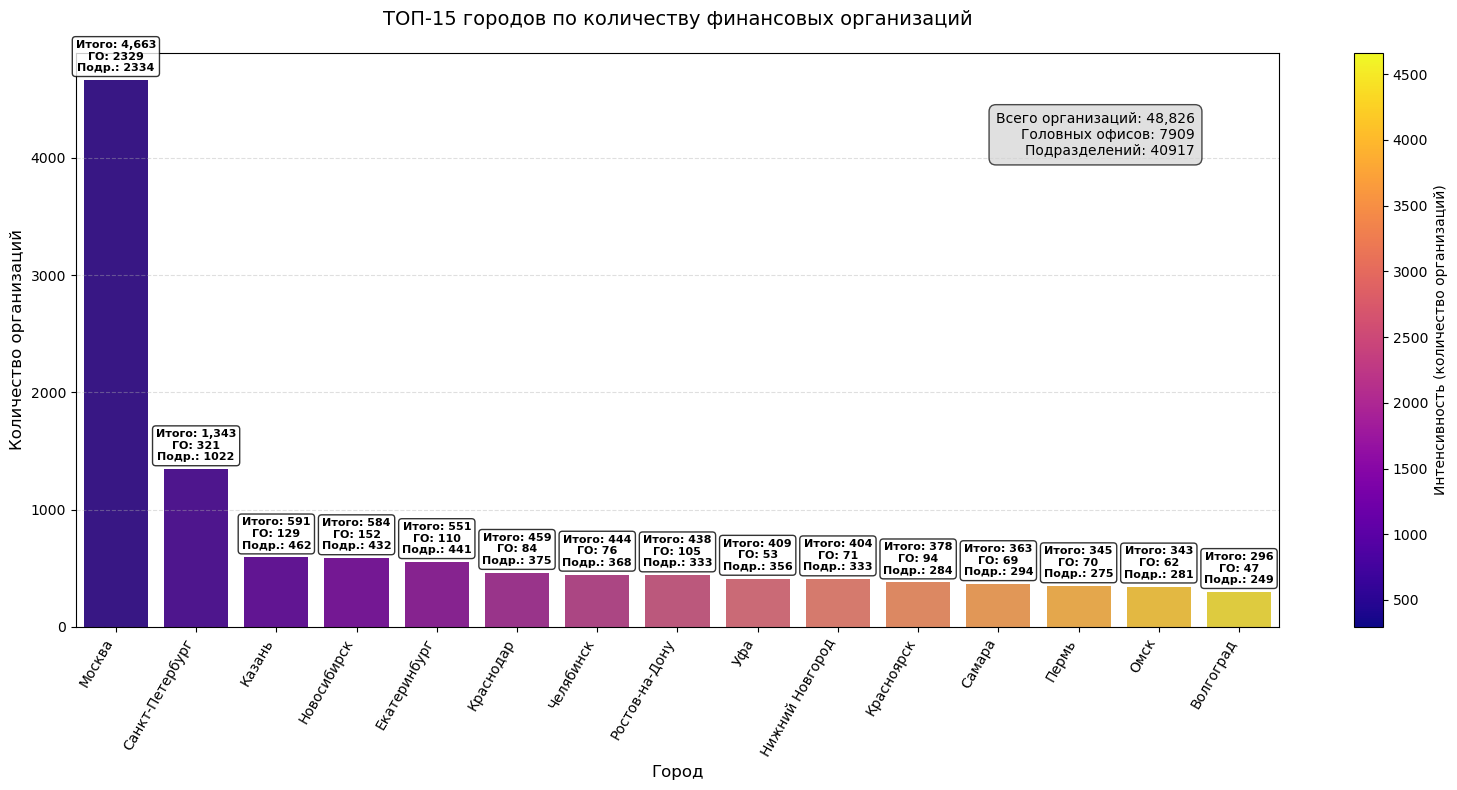

Статистика по ТОП-15 городам:
           city  size  headquarters  subdivisions
         Москва  4663          2329          2334
Санкт-Петербург  1343           321          1022
         Казань   591           129           462
    Новосибирск   584           152           432
   Екатеринбург   551           110           441
      Краснодар   459            84           375
      Челябинск   444            76           368
 Ростов-на-Дону   438           105           333
            Уфа   409            53           356
Нижний Новгород   404            71           333
     Красноярск   378            94           284
         Самара   363            69           294
          Пермь   345            70           275
           Омск   343            62           281
      Волгоград   296            47           249

Всего организаций: 48826
Головных офисов: 7909
Подразделений: 40917


In [315]:
# Группировка по городам
city_stats = df.groupby('city', as_index=False).size().sort_values('size', ascending=False).head(15)

# Подсчет головных офисов и подразделений для каждого города
headquarters_count = df[df['type'] == 'Головной офис'].groupby('city').size()
subdivisions_count = df[df['type'] != 'Головной офис'].groupby('city').size()

# Добавила данные в таблицу
city_stats = city_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='city', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='city', 
    right_index=True, 
    how='left'
)

# Заполнила пропущенные значения нулями
city_stats[['headquarters', 'subdivisions']] = city_stats[['headquarters', 'subdivisions']].fillna(0).astype(int)

# Нормализация значений для цветовой шкалы
norm = plt.Normalize(city_stats['size'].min(), city_stats['size'].max())

# Словарь с данными для быстрого доступа
data_dict = {}
for _, row in city_stats.iterrows():
    data_dict[row['city']] = {
        'total': row['size'],
        'ho': row['headquarters'],
        'sub': row['subdivisions']
    }

# Визуализация 
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    data=city_stats, 
    x='city', 
    y='size', 
    hue='city',
    palette='plasma',
    legend=False,
    dodge=False
)

# Добавление подписей
for i, p in enumerate(ax.patches):
    city_name = city_stats.iloc[i]['city']
    data = data_dict[city_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=8, 
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Настройка внешнего вида
plt.title('ТОП-15 городов по количеству финансовых организаций', fontsize=14, pad=20)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество организаций', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Цветовая шкала
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Интенсивность (количество организаций)', fontsize=10)

# Общая статистика
total_orgs = len(df)
total_ho = len(df[df['type'] == 'Головной офис'])
total_sub = len(df[df['type'] != 'Головной офис'])

# Перемещение блока статистики в правый верхний угол
plt.figtext(0.75, 0.8, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.show()

print("Статистика по ТОП-15 городам:")
print(city_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")

<font size="4">**4. Анализ распределения по видам участников (ТОП-15)**</font><br>
<br>
Круговые диаграммы по типам организаций:

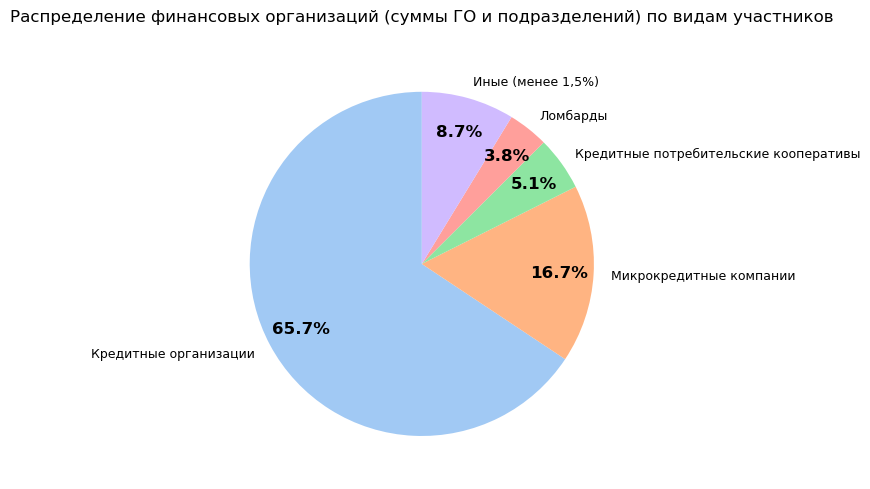

In [318]:
# Группировка по типам участников
tp_stats = df['tp'].value_counts().reset_index()
tp_stats.columns = ['type', 'count']

# Разделила на основные категории и "Иные"
threshold = 0.015  # 1,5% порог
main_categories = tp_stats[tp_stats['count'] / tp_stats['count'].sum() >= threshold]
other_categories = tp_stats[tp_stats['count'] / tp_stats['count'].sum() < threshold]

# Создала новую строку для "Иные"
other_sum = other_categories['count'].sum()
other_list = other_categories['type'].tolist()

# Итоговый датафрейм
final_stats = pd.concat([
    main_categories,
    pd.DataFrame({'type': ['Иные (менее 1,5%)'], 'count': [other_sum]})
])

# Визуализация (круговая диаграмма)
plt.figure(figsize=(12, 5))
wedges, texts, autotexts = plt.pie(
    final_stats['count'],
    labels=final_stats['type'],
    autopct=lambda p: f'{p:.1f}%' if p >= threshold*100 else '',
    startangle=90,
    pctdistance=0.8,
    textprops={'fontsize': 9},
    colors=sns.color_palette('pastel', n_colors=len(final_stats))
)

# Отображение текста
for text in texts:
    text.set_fontsize(9)
    
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.title('Распределение финансовых организаций (суммы ГО и подразделений) по видам участников', pad=20, fontsize=12)
plt.tight_layout()
plt.show()

<font size="4">**5. Тепловая карта по ФО (анализ плотности)**</font>


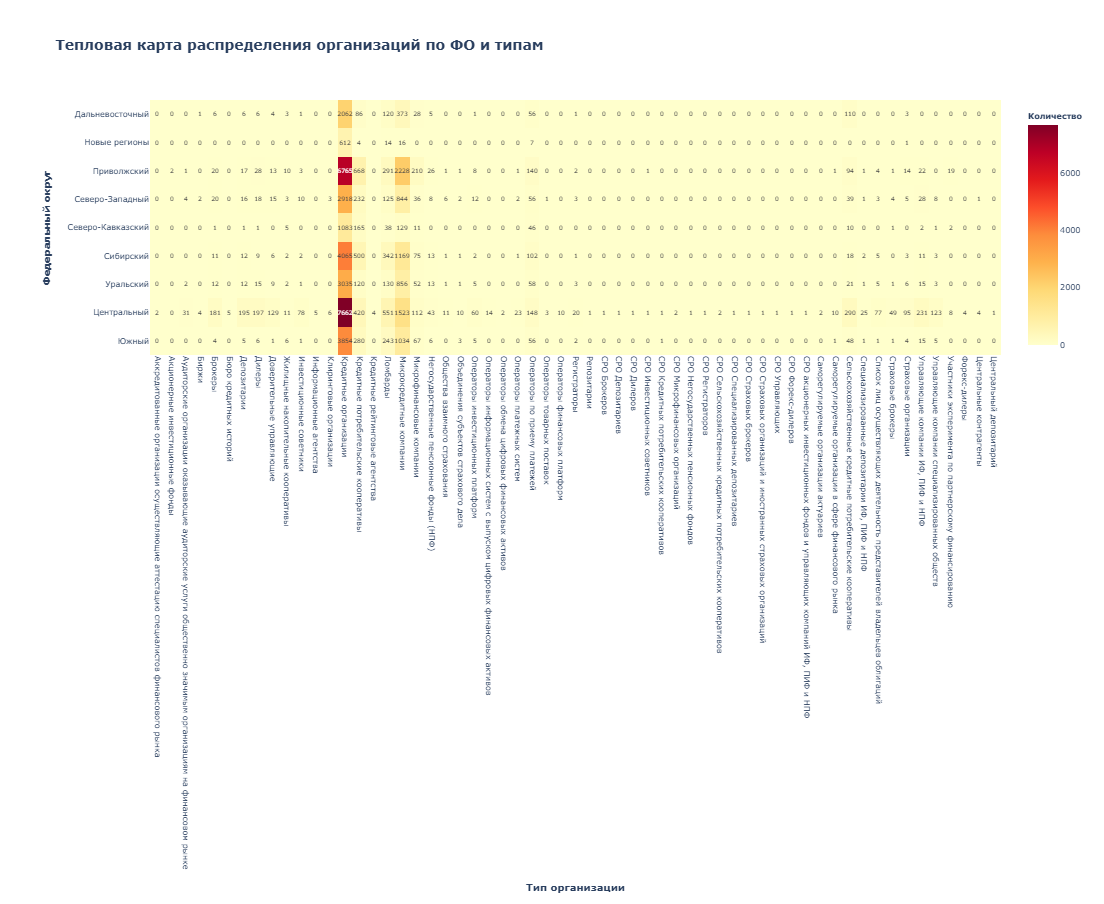

In [321]:
# Создание сводной таблицы
pivot_table = df.pivot_table(index='federal_district', columns='tp', aggfunc='size', fill_value=0)

# Создание тепловой карты 
fig = px.imshow(
    pivot_table,
    color_continuous_scale='YlOrRd',
    labels=dict(x="Тип организации", y="Федеральный округ", color="Количество"),
    title='<b>Тепловая карта распределения организаций по ФО и типам</b>',
    width=1200,  
    height=800 + len(pivot_table)*10,  
    text_auto=True,  
    aspect="auto"  
)

# Настройка отображения
fig.update_layout(
    font=dict(size=8),  
    title_font=dict(size=14),  
    xaxis=dict(
        title='<b>Тип организации</b>',
        tickangle=90,
        tickfont=dict(size=8)  
    ),
    yaxis=dict(
        title='<b>Федеральный округ</b>',
        tickfont=dict(size=8)  
    ),
    coloraxis_colorbar=dict(
        title='<b>Количество</b>',
        title_font=dict(size=8)
    ),
    margin=dict(l=150, r=50, t=100, b=150),  
)


fig.update_traces(
    textfont=dict(size=6),  # Размер цифр в ячейках
    hovertemplate="<b>ФО:</b> %{y}<br><b>Тип:</b> %{x}<br><b>Количество:</b> %{z}<extra></extra>"
)

# автоматическое масштабирование
fig.update_layout(autosize=True)

fig.show()

<font size="4">**5. Тепловая карта в разрезе федеральных округов по регионам (анализ плотности)**</font>

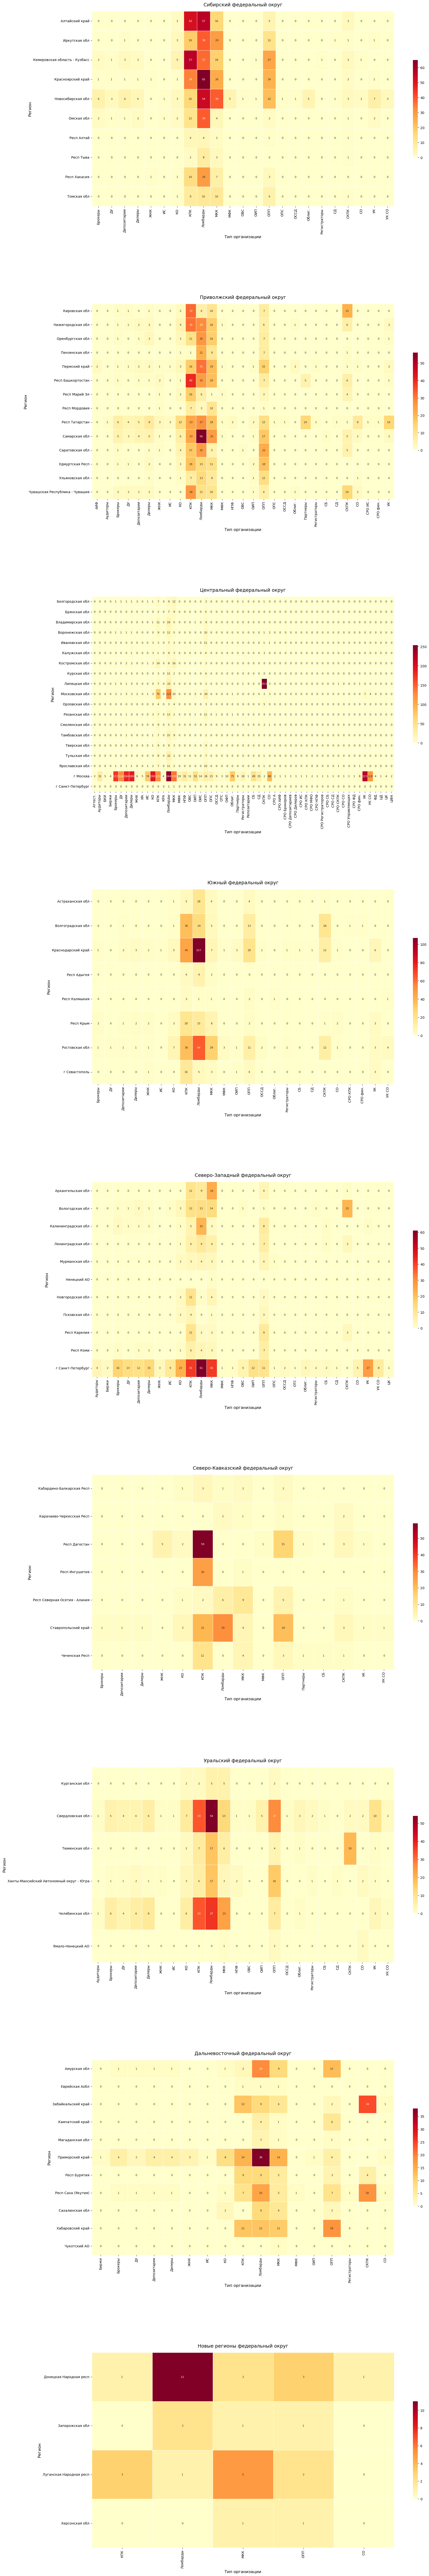

In [324]:
# Список федеральных округов (исключая NaN)
federal_districts = [d for d in df['federal_district'].unique() if pd.notna(d)]

# Создание фигуры с одним столбцом подграфиков
fig, axes = plt.subplots(len(federal_districts), 1, figsize=(20, 15*len(federal_districts)))

# Если только один округ, преобразование axes в массив
if len(federal_districts) == 1:
    axes = [axes]

# Настройка общих отступов
plt.subplots_adjust(hspace=0.5)  #

for i, district in enumerate(federal_districts):
    ax = axes[i]
    
    # Фильтрация данных по округу
    district_df = df[df['federal_district'] == district]
    
    # Проверка наличия данных
    if len(district_df) == 0:
        ax.axis('off')
        continue
    
    # Создание сводной таблицы
    try:
        pivot_table = district_df.pivot_table(
            index='region', 
            columns='short_name', 
            aggfunc='size', 
            fill_value=0
        )
        
        # Тепловая карта 
        sns.heatmap(
            pivot_table, 
            cmap='YlOrRd',
            annot=True,
            fmt='d',
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},
            annot_kws={'size': 8},
            ax=ax
        )
        
        # Подписи
        ax.set_title(f'{district} федеральный округ', pad=15, fontsize=14)
        ax.set_xlabel('Тип организации', fontsize=12)
        ax.set_ylabel('Регион', fontsize=12)
        annot_kws={'size': 12}
        
        # Поворот подписей
        ax.tick_params(axis='x', rotation=90, labelsize=10)
        ax.tick_params(axis='y', rotation=0, labelsize=10)
        
    except Exception as e:
        print(f"Ошибка при обработке округа {district}: {str(e)}")
        ax.axis('off')
        continue

plt.show()

<font size="4">**6. Выявления 20 самых популярных адресов расположения финансовых организаций**</font>

In [327]:
# Создала столбец с полным адресом
df['full_address'] = (df['federal_district'] + ', ' + df['region'] + ', ' + df['city'] + ', ' + df['street'] + ', ' + df['house'].astype(str))

In [329]:
# Группирую по адресу и считаю количество организаций
address_counts = df.groupby('full_address').agg(
    org_count=('name', 'count'),
    org_types=('tp', lambda x: ', '.join(sorted(set(x)))),
    example_name=('name', 'first')
).sort_values('org_count', ascending=False).head(20)

In [330]:
# Добавляю координаты для топ-20 адресов
top_addresses = address_counts.reset_index().merge(
    df.drop_duplicates('full_address')[['full_address', 'geo_lat', 'geo_lon']],
    on='full_address',
    how='left'
)

In [333]:
# Визуализация на карте
import folium

# Создала карту с центром в средних координатах
map_center = [df['geo_lat'].mean(), df['geo_lon'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Добавила маркеры для топ-20 адресов
for idx, row in top_addresses.iterrows():
    # Получение всех организаций для данного адреса
    address_orgs = df[df['full_address'] == row['full_address']]
    
    # Формирование HTML для списка организаций
    orgs_list_html = "<ul style='max-height: 200px; overflow-y: auto;'>"
    for i, org in enumerate(address_orgs.itertuples(), 1):
        orgs_list_html += f"""
        <li style='margin-bottom: 10px;'>
            <b>{i}. {org.name}</b><br>
            ИНН: {org.inn}<br>
            ОГРН: {org.ogrn}<br>
            Тип: {org.type}
        </li>
        """
    orgs_list_html += "</ul>"
    
    popup_text = f"""
    <b>Адрес:</b> {row['full_address']}<br>
    <b>Кол-во организаций:</b> {row['org_count']}<br>
    <b>Типы организаций:</b> {row['org_types']}<br>
    <b>Список организаций:</b><br>
    {orgs_list_html}
    """
    
    folium.CircleMarker(
        location=[row['geo_lat'], row['geo_lon']],
        radius=row['org_count']*0.5,  #
        popup=folium.Popup(popup_text, max_width=400),
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(m)

In [335]:
# Сохранение карты
m.save('top_addresses_map.html')
print("Топ-20 адресов:")
print("\nКарта сохранена как 'top_addresses_map.html'")

print("=" * 80)
print("АНАЛИТИЧЕСКИЙ ОТЧЕТ ПО ТОП-20 АДРЕСАМ")
print("=" * 80)

# Общая статистика
total_orgs = top_addresses['org_count'].sum()
unique_types = df['type'].nunique()
print(f"Общее количество организаций в топ-20 адресах: {total_orgs}")
print(f"Уникальных типов организаций: {unique_types}")
print("-" * 80)

# Детальная статистика по адресам
print("\nТОП-20 АДРЕСОВ ПО КОЛИЧЕСТВУ ОРГАНИЗАЦИЙ:")
print("-" * 80)

for i, (idx, row) in enumerate(top_addresses.iterrows(), 1):
    print(f"{i:2d}. {row['full_address']}")
    print(f"   Организаций: {row['org_count']} | Типы: {row['org_types']}")
    print()

# Статистика по типам организаций
print("-" * 80)
print("СТАТИСТИКА ПО ТИПАМ ОРГАНИЗАЦИЙ:")
print("-" * 80)

type_stats = df['type'].value_counts().head(10)
for type_name, count in type_stats.items():
    percentage = (count / len(df)) * 100
    print(f"{type_name:<30}: {count:>4} ({percentage:.1f}%)")

# Географическая статистика
print("-" * 80)
print("ГЕОГРАФИЧЕСКАЯ СТАТИСТИКА:")
print("-" * 80)
print(f"Общий охват: {len(df)} организаций")
print(f"Адресов с координатами: {df[['geo_lat', 'geo_lon']].notna().all(axis=1).sum()}")
print(f"Диапазон широт: {df['geo_lat'].min():.4f} - {df['geo_lat'].max():.4f}")
print(f"Диапазон долгот: {df['geo_lon'].min():.4f} - {df['geo_lon'].max():.4f}")

# Дополнительные опции
print("-" * 80)
print("ДОПОЛНИТЕЛЬНЫЕ ОПЦИИ:")
print("-" * 80)
print("1. Карта содержит интерактивные маркеры с полной информацией")
print("2. При клике на маркер отображается список всех организаций")
print("3. Размер маркера пропорционален количеству организаций")

Топ-20 адресов:

Карта сохранена как 'top_addresses_map.html'
АНАЛИТИЧЕСКИЙ ОТЧЕТ ПО ТОП-20 АДРЕСАМ
Общее количество организаций в топ-20 адресах: 420
Уникальных типов организаций: 6
--------------------------------------------------------------------------------

ТОП-20 АДРЕСОВ ПО КОЛИЧЕСТВУ ОРГАНИЗАЦИЙ:
--------------------------------------------------------------------------------
 1. Центральный, г Москва, Москва, Пресненская наб, 12
   Организаций: 50 | Типы: Брокеры, Депозитарии, Дилеры, Доверительные управляющие, Инвестиционные советники, Кредитные организации, Кредитные потребительские кооперативы, Микрокредитные компании, Негосударственные пенсионные фонды (НПФ), Операторы инвестиционных платформ, Список лиц осуществляющих деятельность представителей владельцев облигаций, Управляющие компании ИФ, ПИФ и НПФ, Управляющие компании специализированных обществ

 2. Центральный, г Москва, Москва, Пресненская наб, 10
   Организаций: 44 | Типы: Брокеры, Депозитарии, Дилеры, Доверитель

In [337]:
m

<font size="4">**7. Выявления самых популярных названий улиц с подсчетом частоты их встречаемости**</font>

In [342]:
# 1. Предварительная обработка данных
# Удалила пропущенные значения в названиях улиц
df_streets = df[df['street'].notna()].copy()

In [344]:
# Привела названия улиц к единому формату (удаление лишних пробелов, приведение к нижнему регистру)
df_streets['street_clean'] = df_streets['street'].str.strip().str.lower()

In [346]:
# 2. Подсчет частоты встречаемости улиц
street_counts = df_streets['street_clean'].value_counts().reset_index()
street_counts.columns = ['street_name', 'count']

In [348]:
# 3. Топ-20 самых популярных улиц
top_20_streets = street_counts.head(20)

C:\Users\Mi\AppData\Local\Temp\ipykernel_24012\2117450783.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




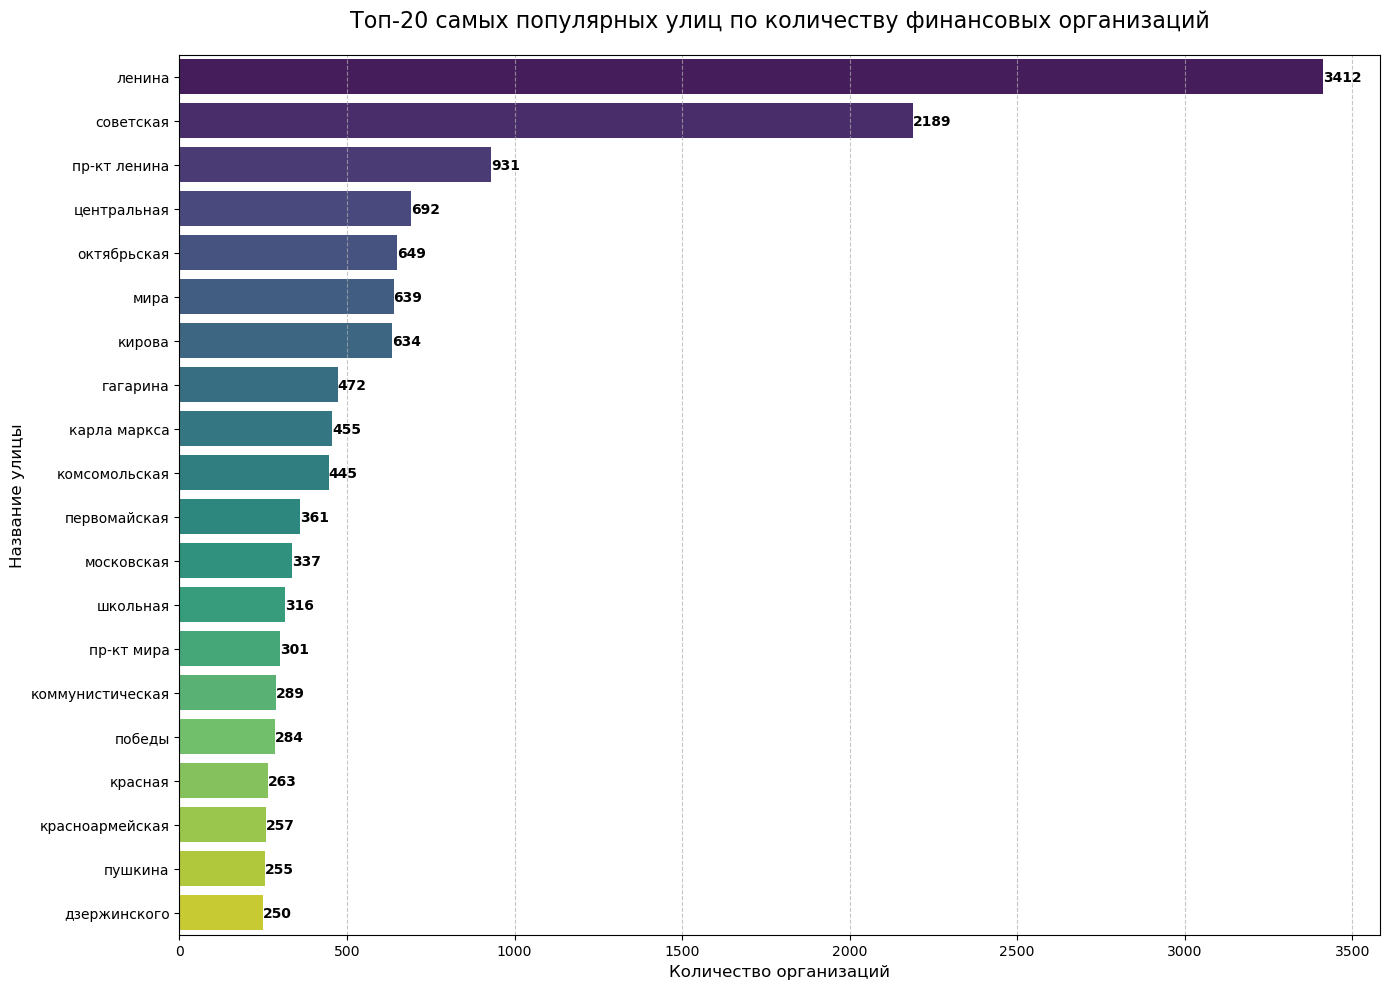

In [352]:
# 4. Визуализация результатов
plt.figure(figsize=(14, 10))
sns.barplot(data=top_20_streets, x='count', y='street_name', palette='viridis')
plt.title('Топ-20 самых популярных улиц по количеству финансовых организаций', fontsize=16, pad=20)
plt.xlabel('Количество организаций', fontsize=12)
plt.ylabel('Название улицы', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Подписи значений
for i, (count, street) in enumerate(zip(top_20_streets['count'], top_20_streets['street_name'])):
    plt.text(count + 0.1, i, f'{count}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('top_streets_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [354]:
# 5. Детальная статистика
print("Топ-20 самых популярных улиц:")
print("=" * 50)
for i, (street, count) in enumerate(zip(top_20_streets['street_name'], top_20_streets['count']), 1):
    print(f"{i:2d}. {street.title():<30} - {count:3d} организаций")

Топ-20 самых популярных улиц:
 1. Ленина                         - 3412 организаций
 2. Советская                      - 2189 организаций
 3. Пр-Кт Ленина                   - 931 организаций
 4. Центральная                    - 692 организаций
 5. Октябрьская                    - 649 организаций
 6. Мира                           - 639 организаций
 7. Кирова                         - 634 организаций
 8. Гагарина                       - 472 организаций
 9. Карла Маркса                   - 455 организаций
10. Комсомольская                  - 445 организаций
11. Первомайская                   - 361 организаций
12. Московская                     - 337 организаций
13. Школьная                       - 316 организаций
14. Пр-Кт Мира                     - 301 организаций
15. Коммунистическая               - 289 организаций
16. Победы                         - 284 организаций
17. Красная                        - 263 организаций
18. Красноармейская                - 257 организаций
19. Пушкина   

In [356]:
# 6. Дополнительная аналитика
print("\n" + "=" * 50)
print("Общая статистика:")
print(f"Всего уникальных улиц: {len(street_counts)}")
print(f"Всего записей с указанной улицей: {len(df_streets)}")
print(f"Среднее количество организаций на улицу: {street_counts['count'].mean():.1f}")
print(f"Медианное количество организаций на улицу: {street_counts['count'].median():.1f}")


Общая статистика:
Всего уникальных улиц: 6812
Всего записей с указанной улицей: 46863
Среднее количество организаций на улицу: 6.9
Медианное количество организаций на улицу: 2.0
